#**Marketing Campaign Analysis**


**Technologies Used:**
```
- Python
- SQLite
- Power BI
```

**Skill Used:**
```
- Python: Data cleaning, EDA, feature engineering, and CSV handling.
- SQL: Table design, loading data, analytical queries, KPIs.
- EDA & Visualization: Univariate, bivariate analysis, segmentation, and insights
- Power BI.
```

Domain : **Marketing Analytics / Customer Analytics**
by Rajaguru Seethamalai

##PHASE 1: Setup & Data Loading

###Step1: Import libraries

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Maxise column
pd.set_option('display.max_columns', None)

###Step2: Load Raw Data

In [ ]:
#Import csv file /marketing_campaign_data.csv /marketing_data_dictionary.csv to panda dataframe

df_marketing_raw = pd.read_csv('/content/marketing_campaign_data.csv')
df_dictionary = pd.read_csv('/content/marketing_data_dictionary.csv')
print("loaded data from csv → dataframe \n")

loaded data from csv → dataframe 



###Step3: Inspect Raw Data

In [ ]:
# To read and understand the dataframe
print(df_dictionary)
df_marketing_raw.head(20)

                  Field                                        Description
0                    ID                       Customer's unique identifier
1            Year_Birth                              Customer's birth year
2             Education                         Customer's education level
3        Marital_Status                          Customer's marital status
4               Income                  Customer's yearly household income
5               Kidhome         Number of children in customer's household
6              Teenhome        Number of teenagers in customer's household
7           Dt_Customer     Date of customer's enrollment with the company
8               Recency      Number of days since customer's last purchase
9              MntWines           Amount spent on wine in the last 2 years
10            MntFruits         Amount spent on fruits in the last 2 years
11      MntMeatProducts           Amount spent on meat in the last 2 years
12      MntFishProducts  

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,342199,1985,Graduation,Together,59011.7,1,0,2012-11-17,3,0,2,45,6,0,16,3,2,5,3,4,0,0,0,0,0,0,0,Spain
1,8075450,1975,Master,Single,1730.0,1,1,2013-04-10,96,0,0,19,1,19,0,1,1,0,2,3,0,0,0,0,0,0,0,Spain
2,13664263,1978,Graduation,Married,98584.6,0,0,2014-01-11,99,920,0,339,0,115,138,3,2,1,6,3,0,0,0,0,0,0,0,Australia
3,16164787,1976,Graduation,Married,74031.5,1,0,2014-06-18,47,265,0,130,7,1,75,1,4,0,11,4,0,0,0,0,0,0,0,Spain
4,15815139,1981,Graduation,Divorced,52784.2,1,1,2014-05-20,0,30,3,55,242,0,0,1,3,2,3,6,0,0,0,0,0,0,0,Canada
5,7194200,1977,2n Cycle,Married,36353.5,1,0,2014-03-28,99,0,0,61,7,6,58,2,1,7,2,4,0,0,0,0,0,0,0,Canada
6,2330269,1960,Basic,Divorced,111080.3,0,0,2013-08-05,14,152,68,225,259,20,119,0,4,4,6,2,0,0,0,0,0,0,0,Germany
7,12076936,1996,PhD,Divorced,55986.3,1,1,2014-02-16,52,80,0,16,0,0,2,1,4,0,6,4,0,0,0,0,0,0,0,India
8,13223357,1964,Master,Single,67793.7,1,0,2013-01-28,11,5,0,47,14,0,25,1,3,1,4,4,0,0,0,0,0,0,0,Saudi Arabia
9,7068405,1968,Graduation,Together,54240.7,1,1,2014-06-29,69,87,3,42,0,89,30,1,3,0,0,0,0,0,0,1,0,0,0,USA


In [ ]:
df_marketing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   56000 non-null  int64  
 1   Year_Birth           56000 non-null  int64  
 2   Education            56000 non-null  object 
 3   Marital_Status       56000 non-null  object 
 4   Income               56000 non-null  float64
 5   Kidhome              56000 non-null  int64  
 6   Teenhome             56000 non-null  int64  
 7   Dt_Customer          56000 non-null  object 
 8   Recency              56000 non-null  int64  
 9   MntWines             56000 non-null  int64  
 10  MntFruits            56000 non-null  int64  
 11  MntMeatProducts      56000 non-null  int64  
 12  MntFishProducts      56000 non-null  int64  
 13  MntSweetProducts     56000 non-null  int64  
 14  MntGoldProds         56000 non-null  int64  
 15  NumDealsPurchases    56000 non-null 

In [ ]:
print(df_marketing_raw.describe())

                 ID    Year_Birth         Income       Kidhome      Teenhome  \
count  5.600000e+04  56000.000000   56000.000000  56000.000000  56000.000000   
mean   8.389352e+06   1971.666696   57252.189521      0.539911      0.362143   
std    4.844638e+06     12.211066   34307.247999      0.521349      0.510567   
min    3.600000e+01   1936.000000    1730.000000      0.000000      0.000000   
25%    4.187372e+06   1963.000000   28252.025000      0.000000      0.000000   
50%    8.383784e+06   1973.000000   58838.550000      1.000000      0.000000   
75%    1.258576e+07   1981.000000   86930.650000      1.000000      1.000000   
max    1.677716e+07   1996.000000  258027.500000      2.000000      2.000000   

            Recency      MntWines     MntFruits  MntMeatProducts  \
count  56000.000000  56000.000000  56000.000000     56000.000000   
mean      63.221107    246.981482     16.152661       268.294018   
std       31.157066    358.569481     33.931463       342.165712   
min    

In [ ]:
#show income of 1730 - data
#df_marketing_raw.Income.value_counts().sort_index()
print(df_marketing_raw['Income'].describe())

count     56000.000000
mean      57252.189521
std       34307.247999
min        1730.000000
25%       28252.025000
50%       58838.550000
75%       86930.650000
max      258027.500000
Name: Income, dtype: float64


##PHASE 2: Data Cleaning & Transformation

###Step 1: Rename Columns (Raw → Clean)

In [ ]:
#df_marketing_raw with old names to df_marketing new column name

rename_dict = {
    'ID': 'customer_id',
    'Year_Birth': 'birth_year',
    'Education': 'edu_level',
    'Marital_Status': 'marital_status',
    'Income': 'annual_income',
    'Kidhome': 'num_children',
    'Teenhome': 'num_teens',
    'Dt_Customer': 'enrolled_date',
    'Recency': 'recency_days',
    'MntWines': 'spend_wine',
    'MntFruits': 'spend_fruit',
    'MntMeatProducts': 'spend_meat',
    'MntFishProducts': 'spend_fish',
    'MntSweetProducts': 'spend_sweet',
    'MntGoldProds': 'spend_gold',
    'NumDealsPurchases': 'purch_on_deals',
    'NumWebPurchases': 'purch_web',
    'NumCatalogPurchases': 'purch_catalog',
    'NumStorePurchases': 'purch_store',
    'NumWebVisitsMonth': 'web_visits',
    'AcceptedCmp1': 'acpt_cmpn_1',
    'AcceptedCmp2': 'acpt_cmpn_2',
    'AcceptedCmp3': 'acpt_cmpn_3',
    'AcceptedCmp4': 'acpt_cmpn_4',
    'AcceptedCmp5': 'acpt_cmpn_5',
    'Response': 'acpt_cmpn_6',
    'Complain': 'has_complained',
    'Country': 'country'
    }

df_marketing = df_marketing_raw.rename(columns=rename_dict)
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     56000 non-null  int64  
 1   birth_year      56000 non-null  int64  
 2   edu_level       56000 non-null  object 
 3   marital_status  56000 non-null  object 
 4   annual_income   56000 non-null  float64
 5   num_children    56000 non-null  int64  
 6   num_teens       56000 non-null  int64  
 7   enrolled_date   56000 non-null  object 
 8   recency_days    56000 non-null  int64  
 9   spend_wine      56000 non-null  int64  
 10  spend_fruit     56000 non-null  int64  
 11  spend_meat      56000 non-null  int64  
 12  spend_fish      56000 non-null  int64  
 13  spend_sweet     56000 non-null  int64  
 14  spend_gold      56000 non-null  int64  
 15  purch_on_deals  56000 non-null  int64  
 16  purch_web       56000 non-null  int64  
 17  purch_catalog   56000 non-null 

###Step 2: Create New Columns & Segments

In [ ]:
#Convert enrollment_date to datetime
df_marketing['enrolled_date'] = pd.to_datetime(df_marketing['enrolled_date'])

#Convert age from birth_year
df_marketing['age'] = 2026 - df_marketing['birth_year']

#Create age_segment (Young,Middle,Mature,Senior)
df_marketing['age_segment'] = pd.cut(df_marketing['age'],
                                     bins=[0, 30, 45, 60, float('inf')],
                                     labels=['Young', 'Middle', 'Mature', 'Senior'])

#Create total_spending (sum of 6 product categories)
spending_columns = ['spend_wine',
                    'spend_fruit',
                    'spend_meat',
                    'spend_fish',
                    'spend_sweet',
                    'spend_gold']
df_marketing['total_spend'] = df_marketing[spending_columns].sum(axis=1)

#Create total_purchases (sum of 3 web/catalog/store)
purchase_columns = ['purch_web', 'purch_catalog', 'purch_store']
df_marketing['total_purch'] = df_marketing[purchase_columns].sum(axis=1)

#Create campaign_response_rate (average response across 6 campaigns)
campaign_columns = ['acpt_cmpn_1',
                    'acpt_cmpn_2',
                    'acpt_cmpn_3',
                    'acpt_cmpn_4',
                    'acpt_cmpn_5',
                    'acpt_cmpn_6']
df_marketing['cmpn_response_rate'] = df_marketing[campaign_columns].mean(axis=1)

#Create income_segment (Default/Low,Entry,Middle,High) - Define the income segmentation
income_30p = df_marketing['annual_income'].quantile(0.30)
income_80p = df_marketing['annual_income'].quantile(0.80)

df_marketing['income_segment'] = pd.cut(df_marketing['annual_income'],
                                        bins=[0, 1730, income_30p, income_80p, float('inf')],
                                        labels=['Default/Low', 'Entry', 'Middle', 'High'])

#Create customer_value_stage (Lost/Risk/Potential/Loyal/VIP)
rfm_columns = ['recency_days', 'total_spend', 'total_purch']
rfm_scores = (df_marketing[rfm_columns].rank(pct=True).round(2) * 5)
df_marketing['rfm_score'] = rfm_scores.astype(int).sum(axis=1)
df_marketing['customer_stage'] = pd.cut(df_marketing['rfm_score'],
                                              bins=[-float('inf'),5,9,11,13,float('inf')],
                                              labels=['Lost', 'Risk', 'Potential', 'Loyal', 'VIP'])

#Create preferred_channel (Web/Catalog/Store/Multi)
channel_columns = df_marketing[['purch_web', 'purch_catalog', 'purch_store']].rank(pct=True) * 3
df_marketing['channel_columns'] = channel_columns.idxmax(axis=1).str.replace('purchases_', '')
df_marketing['preferred_channel'] = df_marketing['channel_columns'].replace({'web': 'Web', 'catalog': 'Catalog', 'store': 'Store'})

#Create spending_score (0-100 percentile)
df_marketing['spending_score'] = (df_marketing['total_spend'].rank(pct=True) * 100).round().astype(int)

#Reorder columns( old +  replace +   new)
reorder_columns = ['customer_id', 'country',
                   'age_segment', 'income_segment', 'customer_stage', 'preferred_channel', 'spending_score',
                   'edu_level', 'age', 'marital_status', 'num_children', 'num_teens', 'annual_income',
                   'enrolled_date', 'recency_days',
                   'spend_wine', 'spend_fruit', 'spend_meat', 'spend_fish', 'spend_sweet', 'spend_gold', 'total_spend',
                   'purch_web', 'purch_catalog', 'purch_store', 'purch_on_deals', 'web_visits',
                   'acpt_cmpn_1', 'acpt_cmpn_2', 'acpt_cmpn_3', 'acpt_cmpn_4', 'acpt_cmpn_5', 'acpt_cmpn_6', 'cmpn_response_rate',
                   'has_complained']
df_marketing = df_marketing[reorder_columns]
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         56000 non-null  int64         
 1   country             56000 non-null  object        
 2   age_segment         56000 non-null  category      
 3   income_segment      56000 non-null  category      
 4   customer_stage      56000 non-null  category      
 5   preferred_channel   56000 non-null  object        
 6   spending_score      56000 non-null  int64         
 7   edu_level           56000 non-null  object        
 8   age                 56000 non-null  int64         
 9   marital_status      56000 non-null  object        
 10  num_children        56000 non-null  int64         
 11  num_teens           56000 non-null  int64         
 12  annual_income       56000 non-null  float64       
 13  enrolled_date       56000 non-null  datetime64

In [ ]:
df_marketing.head(10)

,customer_id,country,age_segment,income_segment,customer_stage,preferred_channel,spending_score,edu_level,age,marital_status,num_children,num_teens,annual_income,enrolled_date,recency_days,spend_wine,spend_fruit,spend_meat,spend_fish,spend_sweet,spend_gold,total_spend,purch_web,purch_catalog,purch_store,purch_on_deals,web_visits,acpt_cmpn_1,acpt_cmpn_2,acpt_cmpn_3,acpt_cmpn_4,acpt_cmpn_5,acpt_cmpn_6,cmpn_response_rate,has_complained
0,342199,Spain,Middle,Middle,Lost,purch_catalog,18,Graduation,41,Together,1,0,59011.7,2012-11-17,3,0,2,45,6,0,16,69,2,5,3,3,4,0,0,0,0,0,0,0.000000,0
1,8075450,Spain,Mature,Default/Low,Lost,purch_store,9,Master,51,Single,1,1,1730.0,2013-04-10,96,0,0,19,1,19,0,39,1,0,2,1,3,0,0,0,0,0,0,0.000000,0
2,13664263,Australia,Mature,High,Potential,purch_store,89,Graduation,48,Married,0,0,98584.6,2014-01-11,99,920,0,339,0,115,138,1512,2,1,6,3,3,0,0,0,0,0,0,0.000000,0
3,16164787,Spain,Mature,Middle,Risk,purch_store,52,Graduation,50,Married,1,0,74031.5,2014-06-18,47,265,0,130,7,1,75,478,4,0,11,1,4,0,0,0,0,0,0,0.000000,0
4,15815139,Canada,Middle,Middle,Lost,purch_catalog,43,Graduation,45,Divorced,1,1,52784.2,2014-05-20,0,30,3,55,242,0,0,330,3,2,3,1,6,0,0,0,0,0,0,0.000000,0
5,7194200,Canada,Mature,Middle,Risk,purch_catalog,28,2n Cycle,49,Married,1,0,36353.5,2014-03-28,99,0,0,61,7,6,58,132,1,7,2,2,4,0,0,0,0,0,0,0.000000,0
6,2330269,Germany,Senior,High,Risk,purch_catalog,69,Basic,66,Divorced,0,0,111080.3,2013-08-05,14,152,68,225,259,20,119,843,4,4,6,0,2,0,0,0,0,0,0,0.000000,0
7,12076936,India,Young,Middle,Lost,purch_store,24,PhD,30,Divorced,1,1,55986.3,2014-02-16,52,80,0,16,0,0,2,98,4,0,6,1,4,0,0,0,0,0,0,0.000000,0
8,13223357,Saudi Arabia,Senior,Middle,Lost,purch_store,23,Master,62,Single,1,0,67793.7,2013-01-28,11,5,0,47,14,0,25,91,3,1,4,1,4,0,0,0,0,0,0,0.000000,0
9,7068405,USA,Mature,Middle,Lost,purch_web,38,Graduation,58,Together,1,1,54240.7,2014-06-29,69,87,3,42,0,89,30,251,3,0,0,1,0,1,0,0,0,0,0,0.166667,0


###Step 3: Data Export

In [ ]:
#Save df_marketing to csv
df_marketing.to_csv('marketing_data_clean.csv', index=False)
print("saved to csv")

saved to csv


##PHASE 3:EDA → Exploratory Data Analysis

###Setup and Data Loading

In [ ]:
#load marketing_data_dictionary
#set whitegrid

df_marketing_clean = pd.read_csv('/content/marketing_data_clean.csv')
#sns.set_theme(style="whitegrid")
print(df_marketing_clean.shape)

(56000, 35)


###Block 1: Univariate Analysis

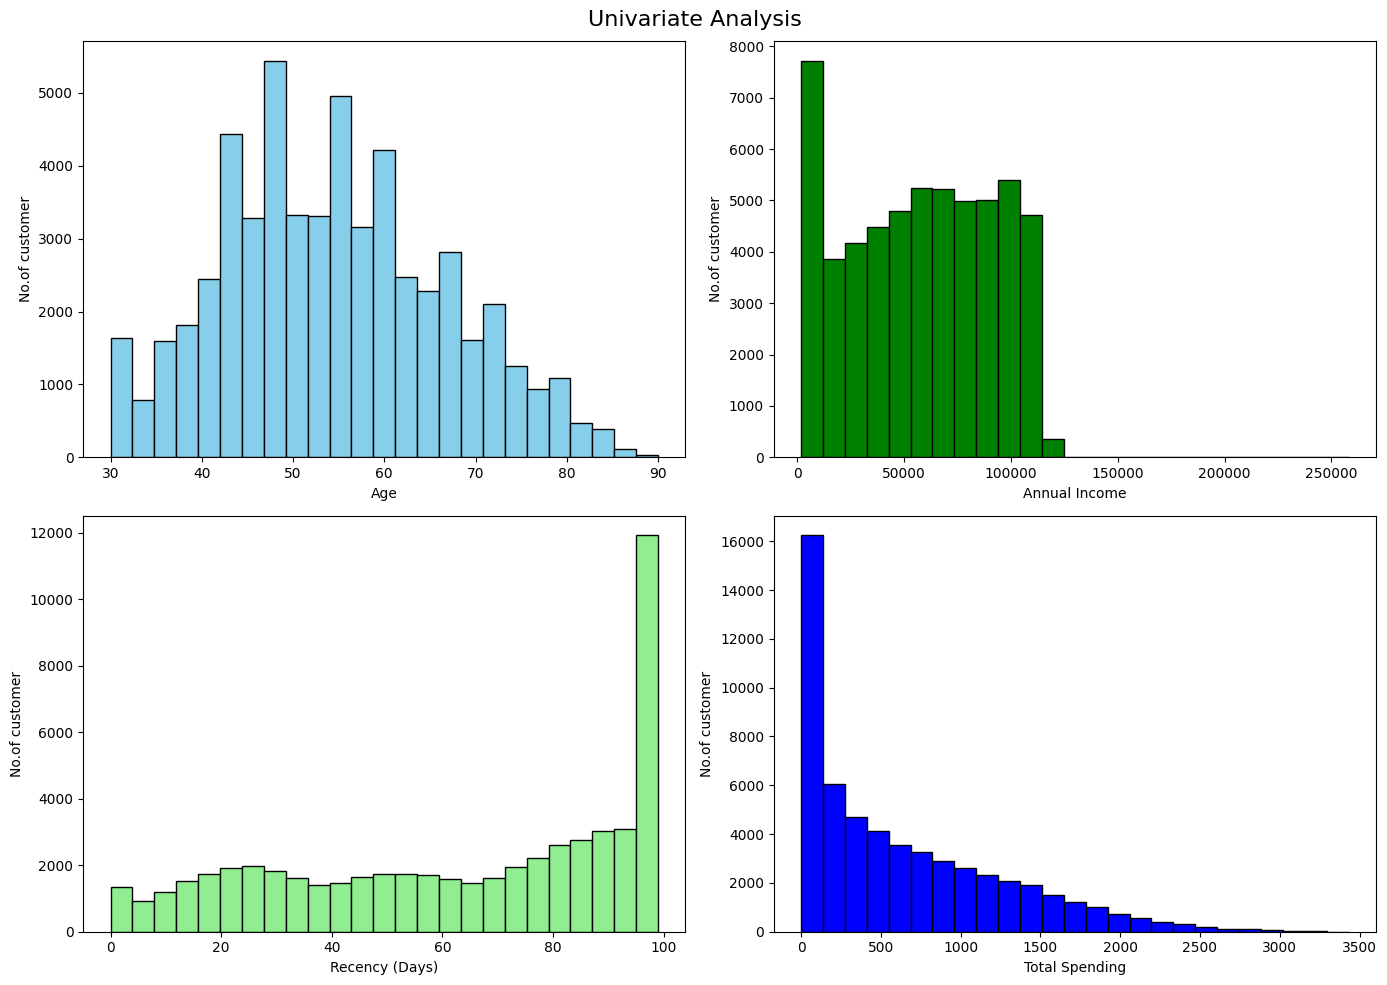

In [ ]:
# Perform univariate analysis: distributions of age, income, spending, recency
# age, annual_income, recency_days, total_spending

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Univariate Analysis', fontsize=16)

#Age
axes[0, 0].hist(df_marketing_clean['age'], bins=25, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('No.of customer')

#Income
axes[0, 1].hist(df_marketing_clean['annual_income'], bins=25, color='green', edgecolor='black')
axes[0, 1].set_xlabel('Annual Income')
axes[0, 1].set_ylabel('No.of customer')

#Recency
axes[1, 0].hist(df_marketing_clean['recency_days'], bins=25, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Recency (Days)')
axes[1, 0].set_ylabel('No.of customer')

#Total Spending
axes[1, 1].hist(df_marketing_clean['total_spend'], bins=25, color='blue', edgecolor='black')
axes[1, 1].set_xlabel('Total Spending')
axes[1, 1].set_ylabel('No.of customer')

plt.tight_layout()
plt.show()

###Block 2: Bivariate Analysis

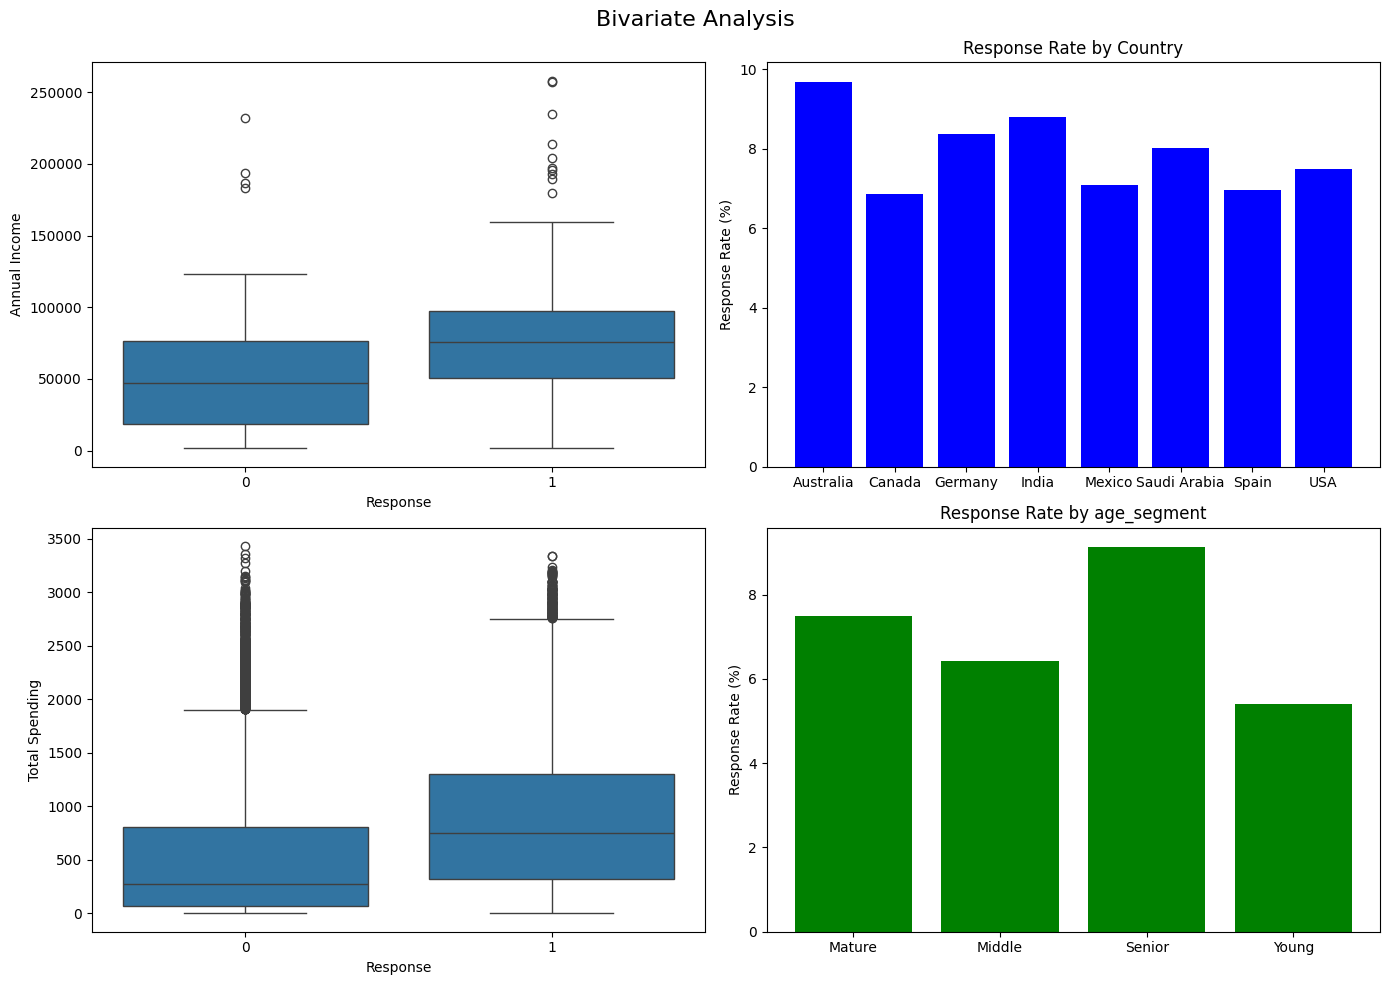

In [ ]:
#Perform bivariate/multivariate analysis: response vs. income, response vs. country, response vs. product spend, age_segment vs. response, etc.
#campaign_response_rate vs annual_income, country, total_spend , age_segment

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bivariate Analysis', fontsize=16)

#create response (1 = responder, 0 = non-responder)
df_marketing_clean['response'] = (df_marketing_clean['cmpn_response_rate'] > 0).astype(int)

#1. response vs income
sns.boxplot(x='response', y='annual_income', data=df_marketing_clean, ax=axes[0, 0])
axes[0, 0].set_xlabel('Response')
axes[0, 0].set_ylabel('Annual Income')

#2. response vs country
country_response = df_marketing_clean.groupby('country')['cmpn_response_rate'].mean() * 100
axes[0,1].bar(country_response.index, country_response.values, color='blue')
axes[0,1].set_title('Response Rate by Country')
axes[0,1].set_ylabel('Response Rate (%)')

#3. response vs total_spend
sns.boxplot(x='response', y='total_spend', data=df_marketing_clean, ax=axes[1, 0])
axes[1,0].set_xlabel('Response')
axes[1,0].set_ylabel('Total Spending')


#4. response vs age_segment
age_response = df_marketing_clean.groupby('age_segment')['cmpn_response_rate'].mean() * 100
axes[1,1].bar(age_response.index, age_response.values, color='green')
axes[1,1].set_title('Response Rate by age_segment')
axes[1,1].set_ylabel('Response Rate (%)')


plt.tight_layout()
plt.show()

### Block 3: Multivariate Analysis

####HeatMap 1

Text(0.5, 1.0, 'Customer Demographics, Spending & Campaign Performance')

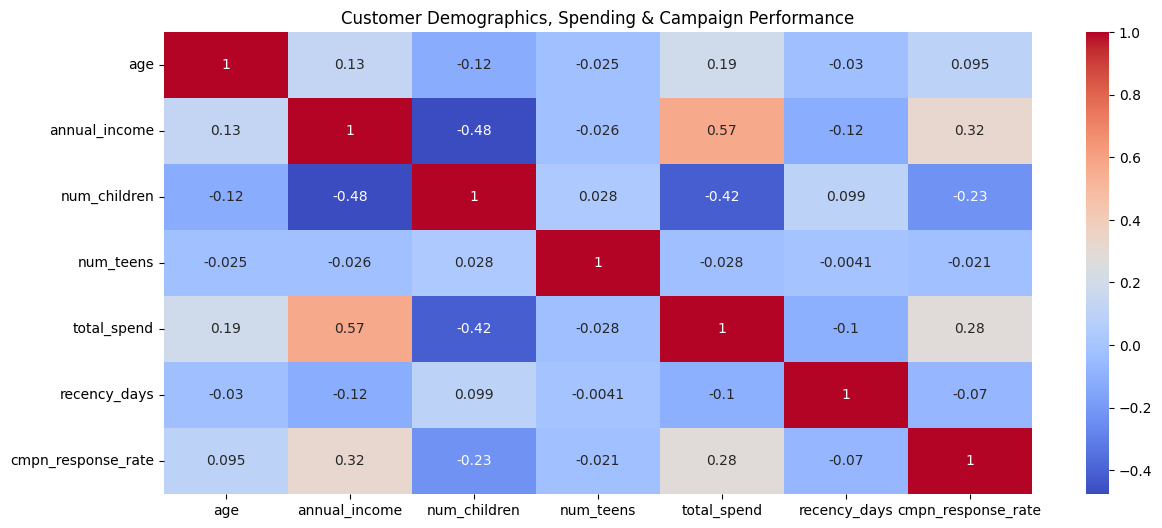

In [ ]:
fig, axes = plt.subplots(figsize=(14, 6))

# Heatmap: Customer Demographics, Spending & Campaign Performance
customer_relationship_cols = ['age', 'annual_income','num_children' , 'num_teens', 'total_spend', 'recency_days', 'cmpn_response_rate']
customer_relationship_corr = df_marketing_clean[customer_relationship_cols].corr()
sns.heatmap(customer_relationship_corr, annot=True, cmap='coolwarm')
axes.set_title('Customer Demographics, Spending & Campaign Performance')

####HeatMap 2

<Axes: >

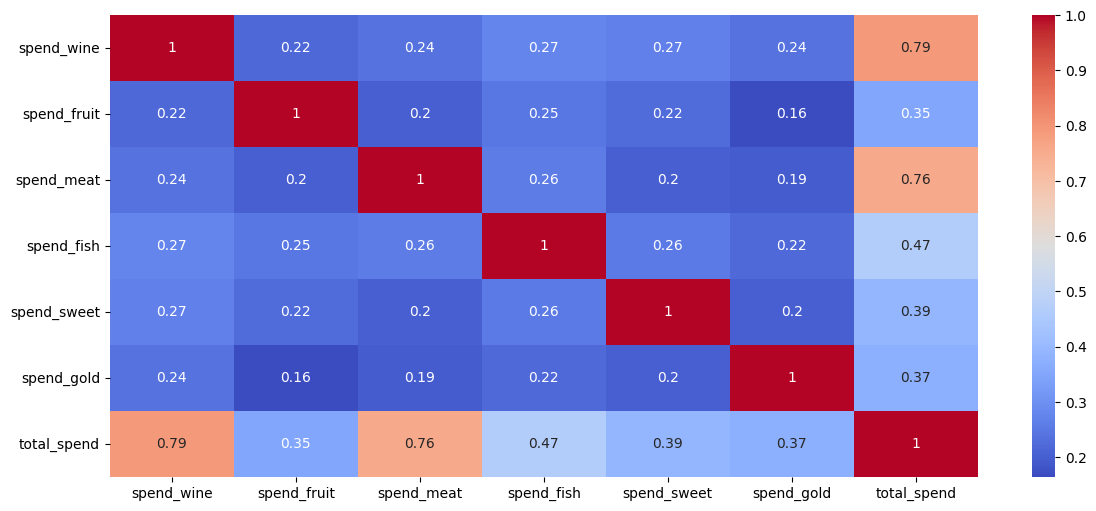

In [ ]:
fig, axes = plt.subplots(figsize=(14, 6))

# Heatmap: Channel Usage & Response

channel_response_cols = ['spend_wine', 'spend_fruit', 'spend_meat', 'spend_fish', 'spend_sweet', 'spend_gold', 'total_spend']
channel_response_corr = df_marketing_clean[channel_response_cols].corr()
sns.heatmap(channel_response_corr, annot=True, cmap='coolwarm')

##PHASE 4: Database SQLite

###Step 1: Create Database Connection

In [ ]:
# create a SQLite db and connect it

conn = sqlite3.connect('marketing.db')
print("Opened database successfully")

Opened database successfully


###Step 2: Load Data to created db

In [ ]:
#Load the marketing_data_clean dataframe to marketing.db table "cust_metrics"

df_marketing_clean.to_sql('cust_metrics', conn, if_exists='replace', index=False)
print("Loaded data to db successfully")

Loaded data to db successfully


###Step 3: Verify Table Structure

In [ ]:
#Table data preview
df_preview = pd.read_sql_query("SELECT * FROM cust_metrics LIMIT 5", conn)

db_row = pd.read_sql_query("SELECT COUNT(*) FROM cust_metrics", conn)

print(df_marketing_clean.shape)
print(df_preview.shape)
print(db_row.iloc[0, 0])

(56000, 36)
(5, 36)
56000


##PHASE 5: QUERIES

###QUERY 1: Compute All KPI Metrics

In [ ]:
#Purpose: Single row with 9 critical business metrics for top KPI cards
#total customer, total revenue, avg spend, avg customer income, campaign response rate, avg recency, avg website visits, avg deal user, avg/total complain

query1 = '''
SELECT
      COUNT(DISTINCT customer_id) AS total_customers,
      ROUND(SUM(total_spend),2) AS total_revenue,
      ROUND(AVG(total_spend),2) AS avg_spend,
      ROUND(AVG(annual_income),2) AS avg_customer_income,
      ROUND(AVG(cmpn_response_rate)*100,2) AS avg_cmpn_response,
      ROUND(AVG(recency_days),2) AS avg_recency,
      ROUND(AVG(web_visits),2) AS avg_web_visits,
      ROUND(SUM(purch_on_deals),2) AS deal_user,
      SUM(has_complained) AS total_complained,
      ROUND(AVG(has_complained)*100,2) AS avg_complained
FROM cust_metrics
'''
result1 = pd.read_sql_query(query1, conn)
result1.to_csv('Market_KPIs.csv', index=False)
result1


,total_customers,total_revenue,avg_spend,avg_customer_income,avg_cmpn_response,avg_recency,avg_web_visits,deal_user,total_complained,avg_complained
0,56000,35858736.0,640.33,57252.19,7.69,63.22,5.17,121630.0,427,0.76


###Query 2: Customer Segments Analysis

In [ ]:
# Age Segment, Income Segment, Education, Marital Status, Family Composition (num_children & num_teen) Country
# Vs
# segment_type, segment_name, customers, segment_revenue, avg_spend, response_rate_pct

query2 = '''
SELECT * FROM (
SELECT
      'Age Segment' AS segment_type,
      age_segment AS segment_name,
      COUNT(DISTINCT customer_id) AS customers,
      ROUND(SUM(total_spend),2) AS segment_revenue,
      ROUND(AVG(total_spend),2) AS avg_spend,
      ROUND(AVG(cmpn_response_rate)*100, 2) AS response_rate_pct
FROM cust_metrics
GROUP BY age_segment
UNION ALL
SELECT
      'Income Segment' AS segment_type,
      income_segment AS segment_name,
      COUNT(DISTINCT customer_id) AS customers,
      ROUND(SUM(total_spend),2) AS segment_revenue,
      ROUND(AVG(total_spend),2) AS avg_spend,
      ROUND(AVG(cmpn_response_rate)*100, 2) AS response_rate_pct
FROM cust_metrics
GROUP BY income_segment
UNION ALL
SELECT
      'Education' AS segment_type,
      edu_level AS segment_name,
      COUNT(DISTINCT customer_id) AS customers,
      ROUND(SUM(total_spend),2) AS segment_revenue,
      ROUND(AVG(total_spend),2) AS avg_spend,
      ROUND(AVG(cmpn_response_rate)*100, 2) AS response_rate_pct
FROM cust_metrics
GROUP BY edu_level
UNION ALL
SELECT
      'Marital Status' AS segment_type,
      marital_status AS segment_name,
      COUNT(DISTINCT customer_id) AS customers,
      ROUND(SUM(total_spend),2) AS segment_revenue,
      ROUND(AVG(total_spend),2) AS avg_spend,
      ROUND(AVG(cmpn_response_rate)*100, 2) AS response_rate_pct
FROM cust_metrics
GROUP BY marital_status
UNION ALL
SELECT
      'Family Composition' AS segment_type,
      CASE
            WHEN num_children = 0 AND num_teens = 0 THEN 'Alone'
            WHEN num_children > 0 AND num_teens = 0 THEN 'With Children'
            WHEN num_children = 0 AND num_teens > 0 THEN 'With Teens'
            ELSE 'Mixed Family'
      END AS segment_name,
      COUNT(DISTINCT customer_id) AS customers,
      ROUND(SUM(total_spend),2) AS segment_revenue,
      ROUND(AVG(total_spend),2) AS avg_spend,
      ROUND(AVG(cmpn_response_rate)*100, 2) AS response_rate_pct
FROM cust_metrics
GROUP BY segment_name
UNION ALL
SELECT
      'Country' AS segment_type,
      country AS segment_name,
      COUNT(DISTINCT customer_id) AS customers,
      ROUND(SUM(total_spend),2) AS segment_revenue,
      ROUND(AVG(total_spend),2) AS avg_spend,
      ROUND(AVG(cmpn_response_rate)*100, 2) AS response_rate_pct
FROM cust_metrics
GROUP BY country
)
ORDER BY
    CASE
        WHEN segment_type = 'Age Segment' THEN 1
        WHEN segment_type = 'Income Segment' THEN 2
        WHEN segment_type = 'Education' THEN 3
        WHEN segment_type = 'Marital Status' THEN 4
        WHEN segment_type = 'Family Composition' THEN 5
        WHEN segment_type = 'Country' THEN 6
    END,
    avg_spend DESC

'''

result2 = pd.read_sql_query(query2, conn)
result2.to_csv('Customer_Segment_Analysis.csv', index=False)
result2

,segment_type,segment_name,customers,segment_revenue,avg_spend,response_rate_pct
0,Age Segment,Senior,16930,13492151.0,796.94,9.13
1,Age Segment,Mature,24689,15099057.0,611.57,7.48
2,Age Segment,Middle,13350,6790894.0,508.68,6.41
3,Age Segment,Young,1031,476634.0,462.30,5.40
4,Income Segment,High,11200,13032747.0,1163.64,12.77
5,Income Segment,Middle,28000,19166233.0,684.51,8.35
6,Income Segment,Entry,12681,3341083.0,263.47,3.81
7,Income Segment,Default/Low,4119,318673.0,77.37,1.34
8,Education,Graduation,22741,16995472.0,747.35,9.17
9,Education,Master,10530,6828691.0,648.50,6.97


###QUERY 3: Products & Channels

In [ ]:
# spending Vs metric_type, metric_name, metric_revenue, avg_spend

query3 = '''
SELECT * FROM (
SELECT
      'Product' AS metric_type,
      'Wine' AS metric_name,
      ROUND(SUM(spend_wine),2) AS metric_revenue,
      ROUND(AVG(spend_wine),2) AS avg_spend
FROM cust_metrics
UNION ALL
SELECT
      'Product' AS metric_type,
      'Fruit' AS metric_name,
      ROUND(SUM(spend_fruit),2) AS metric_revenue,
      ROUND(AVG(spend_fruit),2) AS avg_spend
FROM cust_metrics
UNION ALL
SELECT
      'Product' AS metric_type,
      'Meat' AS metric_name,
      ROUND(SUM(spend_meat),2) AS metric_revenue,
      ROUND(AVG(spend_meat),2) AS avg_spend
FROM cust_metrics
UNION ALL
SELECT
      'Product' AS metric_type,
      'Fish' AS metric_name,
      ROUND(SUM(spend_fish),2) AS metric_revenue,
      ROUND(AVG(spend_fish),2) AS avg_spend
FROM cust_metrics
UNION ALL
SELECT
      'Product' AS metric_type,
      'Sweet' AS metric_name,
      ROUND(SUM(spend_sweet),2) AS metric_revenue,
      ROUND(AVG(spend_sweet),2) AS avg_spend
FROM cust_metrics
UNION ALL
SELECT
      'Product' AS metric_type,
      'Gold' AS metric_name,
      ROUND(SUM(spend_gold),2) AS metric_revenue,
      ROUND(AVG(spend_gold),2) AS avg_spend
FROM cust_metrics
)
ORDER BY metric_type, metric_revenue DESC
'''

result3 = pd.read_sql_query(query3, conn)
result3.to_csv('Product_Channel_Analysis.csv', index=False)
result3

,metric_type,metric_name,metric_revenue,avg_spend
0,Product,Meat,15024465.0,268.29
1,Product,Wine,13830963.0,246.98
2,Product,Fish,2861473.0,51.10
3,Product,Gold,1981595.0,35.39
4,Product,Sweet,1255691.0,22.42
5,Product,Fruit,904549.0,16.15
